# Лабораторная работа 4

**Цель:** проанализировать массив данных с помощью инструментов Python и привести описания

**Инструменты:** JupyterLab, Python, библиотеки: 
- **Данные и математика**: numpy, pandas 
- **Визуализация**: matplotlib, seaborn, mpl_toolkits.mplot3d 
- **Моделирование**: PCA, KMeans, XGBClassifier, train_test_split 
- **Оценка**: confusion_matrix, classification_report, roc_auc_score

## Ход работы

### 1. Подключим необходимые библиотеки:

 **Данные и математика**: numpy, pandas <br>
 **Визуализация**: matplotlib, seaborn, mpl_toolkits.mplot3d <br>
 **Предобработка**: LabelEncoder, StandardScaler <br>
 **Моделирование**: PCA, KMeans, XGBClassifier, train_test_split <br>
 **Оценка**: confusion_matrix, classification_report, roc_auc_score <br>

In [93]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

### 2. Загрузка и первичный анализ данных

Загрузить .csv файл с параметром sep='\t'. Вывести первые 5 строк датасета, информацию по датасету, проверить на пустые значения и удалить их, если они есть.

In [94]:
table = pd.read_csv("marketing_campaign.csv", sep='\t')
table.fillna(0, inplace=True) # Замена пустых значений на 0
with pd.option_context('display.max_columns', None):
    display(table.head(5), table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


None

### 3. Визуализация данных

Вывести графики по 3 группам:

1)  **Количественные**: Образование, семейное положение, наличие детей, наличие подростков
2)  **Распределение**: по году рождения, доходу, общая сумма трат, средняя сумма трат
3)  **Диаграммы**: расходов, покупок и одобрения кампаний.

#### 3.1. Количественные графики

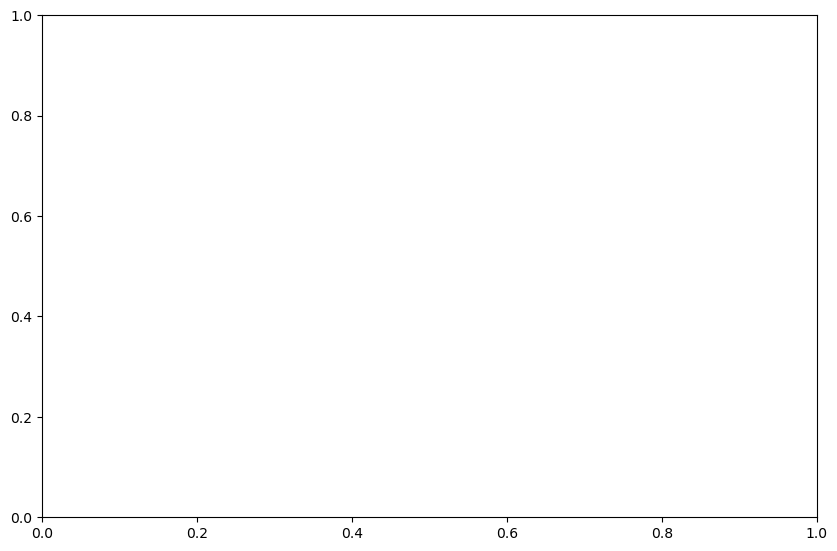

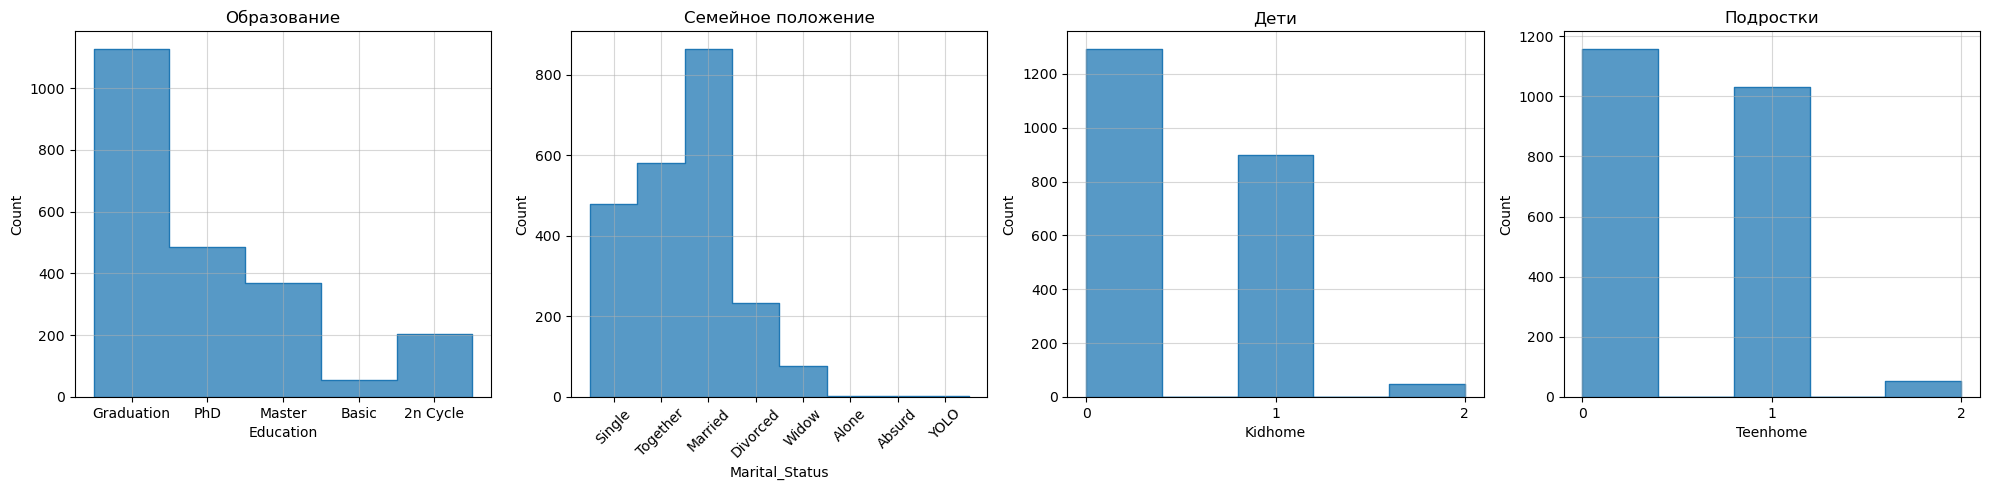

In [95]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(20, 5))

sns.histplot(data=table, x="Education", element="step", ax=ax[0])
ax[0].grid(True, alpha=0.5)
ax[0].set_title('Образование')

sns.histplot(data=table, x="Marital_Status", element="step", ax=ax[1])
ax[1].grid(True, alpha=0.5)
ax[1].set_title('Семейное положение')
ax[1].tick_params(axis='x', rotation=45)

sns.histplot(data=table, x="Kidhome", binwidth=0.4, element="step", ax=ax[2])
ax[2].grid(True, alpha=0.5)
ax[2].set_title('Дети')
ax[2].set_xticks(range(table['Kidhome'].max() + 1))

sns.histplot(data=table, x="Teenhome", binwidth=0.4, element="step", ax=ax[3])
ax[3].grid(True, alpha=0.5)
ax[3].set_title('Подростки')
ax[3].set_xticks(range(table['Teenhome'].max() + 1))

plt.tight_layout()
plt.show()

#### 3.2. Распределения

In [96]:
# Расчёт общей и средней суммы трат
mnt_query = table.loc[:, table.columns.str.startswith('Mnt')]
mnt_total = mnt_query.sum(axis=1)
mnt_avg = mnt_query.mean(axis=1)
display(mnt_query, mnt_total, mnt_avg)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Length: 2240, dtype: int64

0       269.500000
1         4.500000
2       129.333333
3         8.833333
4        70.333333
           ...    
2235    223.500000
2236     74.000000
2237    206.833333
2238    140.500000
2239     28.666667
Length: 2240, dtype: float64

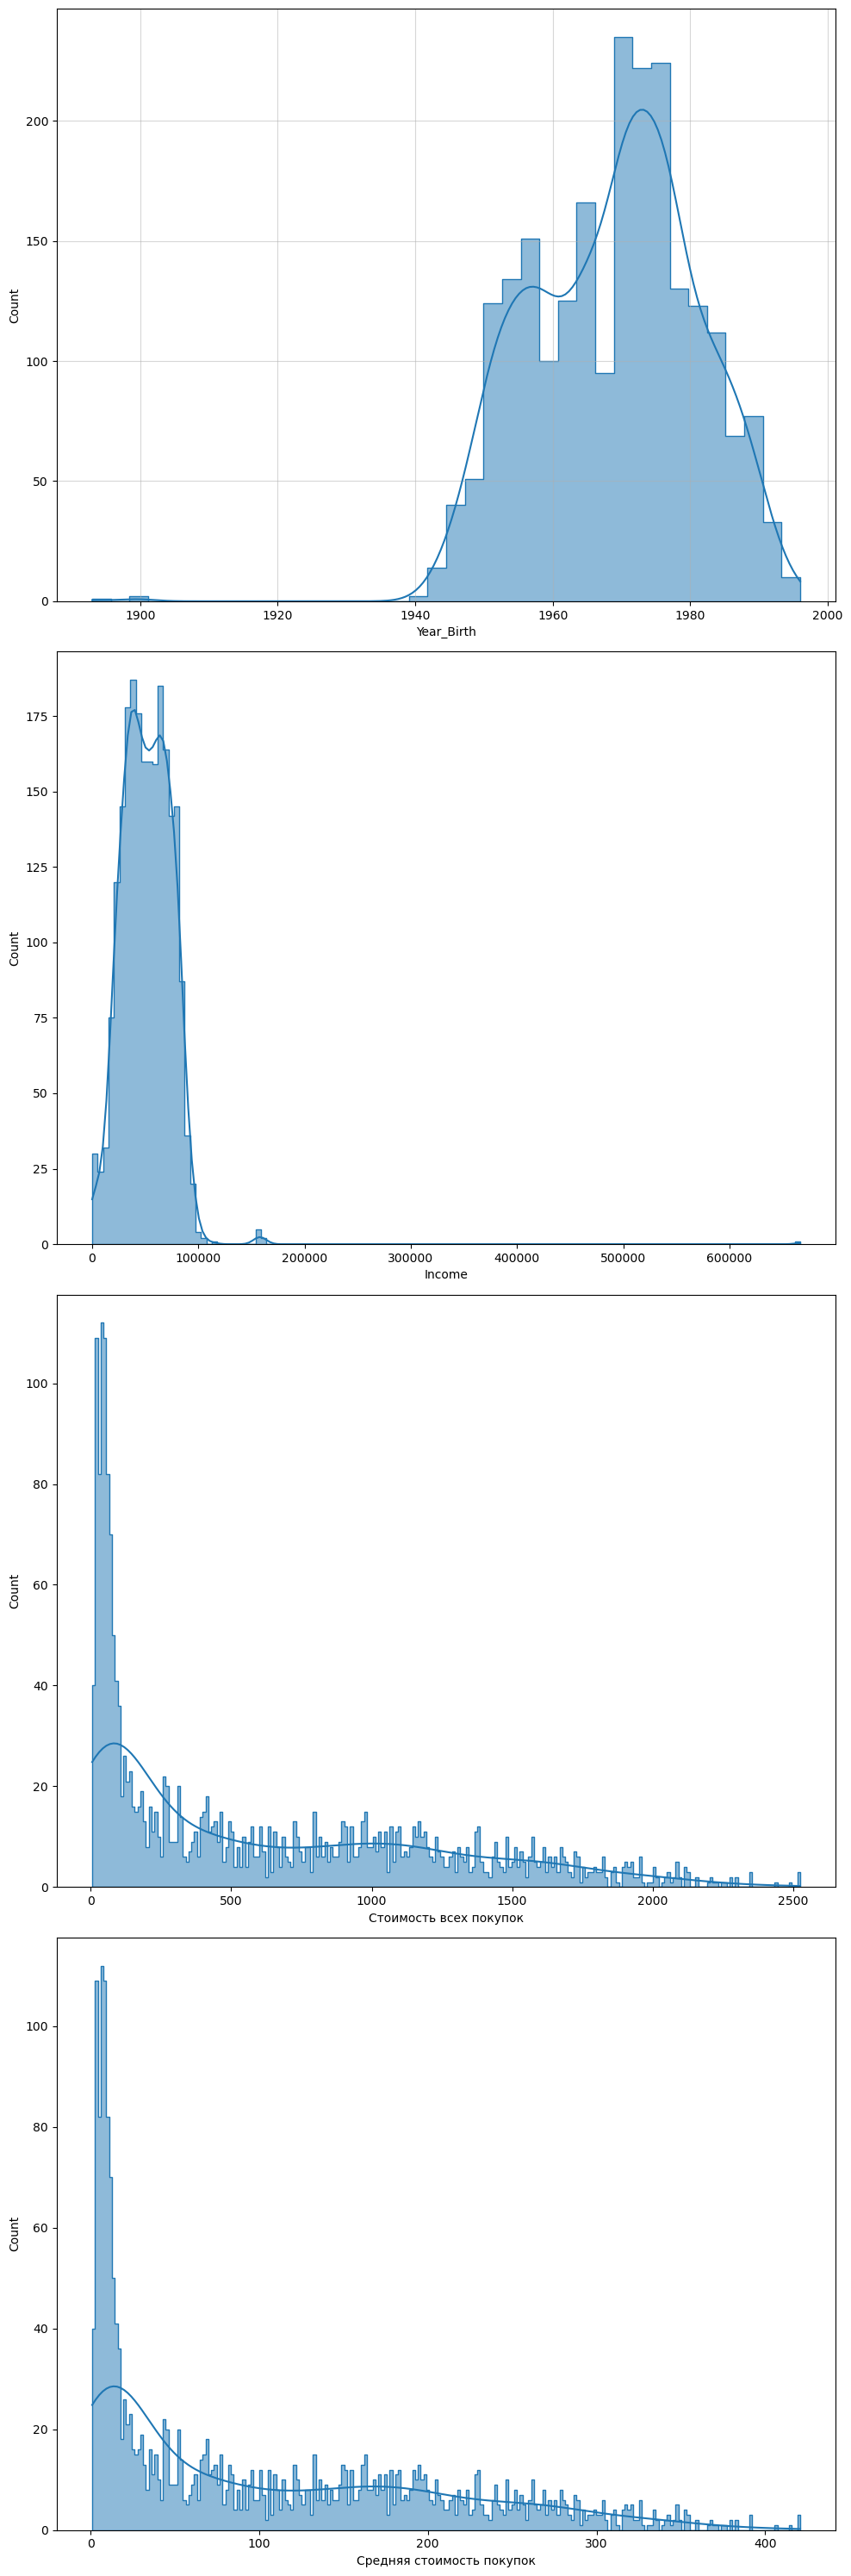

In [97]:
plt.figure(figsize=(10, 30))

plt.subplot(4, 1, 1)
sns.histplot(data=table, x="Year_Birth", element="step", kde=True)
plt.grid(True, alpha=0.5)

plt.subplot(4, 1, 2)
sns.histplot(data=table, x="Income", element="step", kde=True)

plt.subplot(4, 1, 3)
sns.histplot(x=mnt_total, bins=250, element="step", kde=True)
plt.xlabel('Стоимость всех покупок')

plt.subplot(4, 1, 4)
sns.histplot(x=mnt_avg, bins=250, element="step", kde=True)
plt.xlabel('Средняя стоимость покупок')

plt.tight_layout()
plt.show()

#### 3.3 Диаграммы

In [6]:
# Подготовка данных
mnt_dict = mnt_query.sum()

mnt_legend = mnt_dict.index.to_list()
mnt_legend = [item[3:] for item in mnt_legend]

purchase_query = table.loc[:, table.columns.str.contains('Purchase')].sum()
purchase_legend = purchase_query.index.to_list()
purchase_legend = [item[3:len(item)-9] for item in purchase_legend]

cmp_query = table.loc[:, table.columns.str.contains('AcceptedCmp')].sum()
cmp_columns = cmp_query.index.to_list()
cmp_legend = [0] * 5
for item in cmp_columns:
    item = item.replace('AcceptedCmp', 'Campaign ')
    cmp_legend[int(item[-1])-1] = item

display(mnt_dict, mnt_legend, purchase_query, purchase_legend, cmp_query, cmp_legend)

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

['Wines',
 'Fruits',
 'MeatProducts',
 'FishProducts',
 'SweetProducts',
 'GoldProds']

NumDealsPurchases       5208
NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
dtype: int64

['Deals', 'Web', 'Catalog', 'Store']

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']

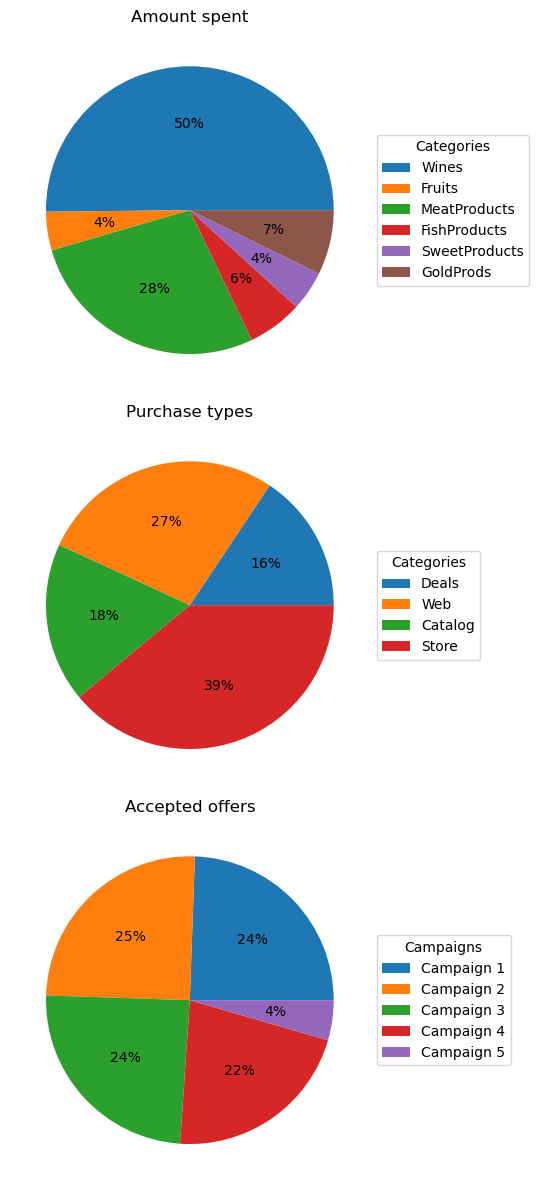

In [7]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1) 
plt.pie(mnt_dict, autopct='%.0f%%')
plt.legend(mnt_legend, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Amount spent")

plt.subplot(3, 1, 2) 
plt.pie(purchase_query, autopct='%.0f%%')
plt.legend(purchase_legend, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Purchase types")

plt.subplot(3, 1, 3) 
plt.pie(cmp_query, autopct='%.0f%%')
plt.legend(cmp_legend, title="Campaigns", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Accepted offers")

plt.tight_layout()
plt.show()

### 4. Предобработка данных

**Цель**: добавить полезную информацию, отформатировать даты и удалить лишние столбцы для более удобного анализа.

**Сводная статистика**: `df.describe().T` показывает ключевые числовые показатели (среднее, мин, макс и т.д.) для всех числовых столбцов.

-   **Обработка дат**: преобразование `Dt_Customer` в формат даты и проверка самых ранних/самых поздних дат присоединения.
-   **Новые признаки**:
    - **Age**: 2021 - Year_Birth.
    - **Total_spent**: Сумма всех расходов на продукцию.
    - **Partner**: 1 если married/together, иначе 0.
    - **Children**: Kids + teens.
    - **Family_size**: Children + partner (если есть) + customer.
    - **Customer_For**: Дней с присоединения (на 2021-12-31).
-   **Очистка**: Удалить `Dt_Customer`, `Z_CostContact`, `Z_Revenue`, `Year_Birth` и `ID`.
-   **Проверка**: Использовать `df.info()` для подтверждения окончательной структуры и типов данных.

#### 4.1. Сводная статистика

In [8]:
table.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,51687.459375,25609.342730,0.0,34722.00,51075.0,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


#### 4.2. Обработка дат: преобразование Dt_Customer в формат даты и проверка самых ранних/самых поздних дат присоединения.

In [9]:
table['Dt_Customer'] = pd.to_datetime(table['Dt_Customer'], format='%d-%m-%Y')
print(f' Самая ранняя дата присоединения: {table['Dt_Customer'].min()}\n',
      f'Самая поздняя дата присоединения: {table['Dt_Customer'].max()}')

 Самая ранняя дата присоединения: 2012-07-30 00:00:00
 Самая поздняя дата присоединения: 2014-06-29 00:00:00


#### 4.3. Добавление новых признаков

In [10]:
table['Age'] = 2021 - table['Year_Birth']
table['Total_spent'] = mnt_total
table['Partner'] = table['Marital_Status'].apply(lambda x: 1 if x in ['Married','Together'] else 0)
table['Children'] = table['Kidhome'] + table['Teenhome']
table['Family_size'] = table['Children'] + table['Partner'] + 1

reference_date = pd.to_datetime('2021-12-31')
table['Customer_For'] = (reference_date - table['Dt_Customer']).dt.days

table.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_spent,Partner,Children,Family_size,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,64,1617,0,0,1,3405
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,67,27,0,2,3,2855
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,56,776,1,0,2,3054
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,37,53,1,1,3,2881
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,40,422,1,1,3,2903


#### 4.4. Очистка 

In [11]:
table.drop(columns=['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'], inplace=True)

#### 4.5. Проверка

In [12]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

### 5. Исследование данных и кодирование

**Цель**: Исследовать взаимосвязи признаков, удалить экстремальные значения и превратить категории в числа.

-   **Pairplot**: Показывает диаграммы рассеяния и распределения для ключевых числовых столбцов (Income, Recency, Customer_For, Age, Total_spent, Family_size) для выявления закономерностей и возможных выбросов.
-   **Удаление выбросов**: Для `Age` и `Income` использовать IQR метод для отбрасывания значений за пределами Q1 - 1.5×IQR или Q3 + 1.5×IQR.
-   **Кодирование категорий**: Применить `LabelEncoder` на `Education` и `Marital_Status` для конвертации текстовых значений в числовые для моделирования.
-   **Проверка**: `df.describe().T` для проверки чистоты данных и новой статистики.

#### 5.1. Pairplot

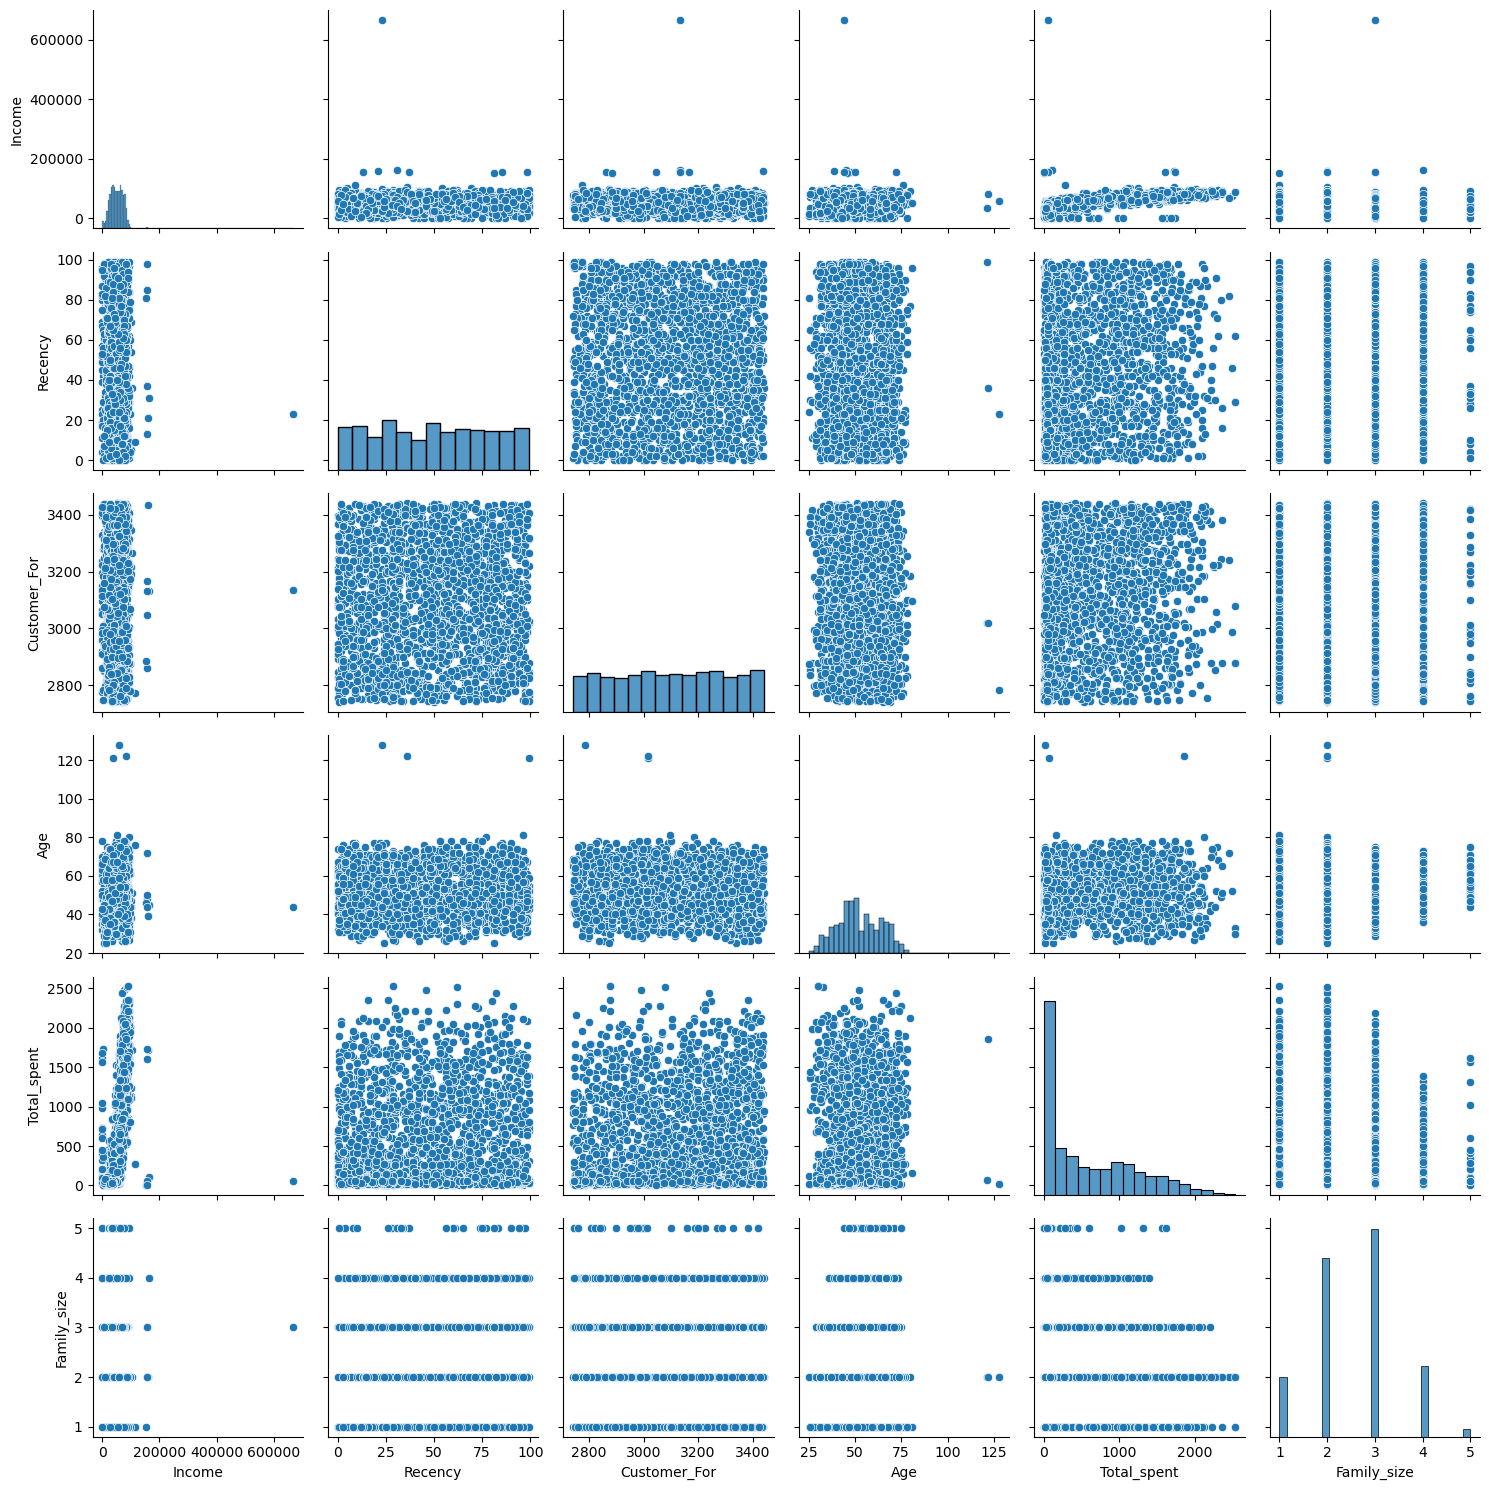

In [13]:
sns.pairplot(table[['Income', 'Recency', 'Customer_For', 'Age', 'Total_spent', 'Family_size']])
plt.tight_layout()
plt.show()

#### 5.2. Удаление выбросов

In [14]:
for column in ['Age', 'Income']:
    q1 = table[column].quantile(0.25)
    q3 = table[column].quantile(0.75)
    iqr = q3 - q1
    low  = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    table = table[(table[column] >= low) & (table[column] <= high)]

#### 5.3. Кодирование категорий

In [15]:
label_education = LabelEncoder()
label_marital_status = LabelEncoder()

table['Education'] = label_education.fit_transform(table['Education'])
table['Marital_Status'] = label_marital_status.fit_transform(table['Marital_Status'])

#### 5.4. Проверка

In [16]:
table.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2229.0,2.392553,1.122544,0.0,2.0,2.0,3.0,4.0
Marital_Status,2229.0,3.729475,1.075656,0.0,3.0,4.0,5.0,7.0
Income,2229.0,51066.271422,21279.240126,0.0,34600.0,50943.0,68118.0,113734.0
Kidhome,2229.0,0.444594,0.538636,0.0,0.0,0.0,1.0,2.0
Teenhome,2229.0,0.507402,0.544735,0.0,0.0,0.0,1.0,2.0
Recency,2229.0,49.106326,28.946476,0.0,24.0,49.0,74.0,99.0
MntWines,2229.0,304.991476,336.761943,0.0,24.0,176.0,505.0,1493.0
MntFruits,2229.0,26.348587,39.764060,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2229.0,165.283984,219.336589,0.0,16.0,67.0,231.0,1725.0
MntFishProducts,2229.0,37.642441,54.700548,0.0,3.0,12.0,50.0,259.0


### 6. Корреляционный анализ и масштабирование признаков
**Цель**: проверить взаимосвязи объектов, подготовить данные для группировки или моделирования и масштабировать числовые значения.

-   **Тепловая карта корреляций**: `df.corr()` + `sns.heatmap()` чтобы увидеть, как числовые характеристики соотносятся друг с другом и выявить сильные или избыточные связи.
-   **Подготовка датасета**: Создать копию (`df2`) и удалить целевые столбцы (`AcceptedCmp1--5`, `Complain`, `Response`), чтобы сфокусироваться на описательных признаках.
-   **Группы признаков**: Разделить числовые столбцы (доход, покупки, траты, данные о семье) от категориальных (закодированные `Education`, `Marital_Status`, `Partner`).
-   **Масштабирование**: Использовать `StandardScaler` для стандартизации числовых данных (среднее 0, ст. откл. 1), затем объединить масштабированные числовые данные с категориальными столбцами в `scaled_df`.
-   **Проверка**: `scaled_df.head()` и `scaled_df.shape` подтверждают преобразованный датасет.

#### 6.1. Тепловая карта корреляций

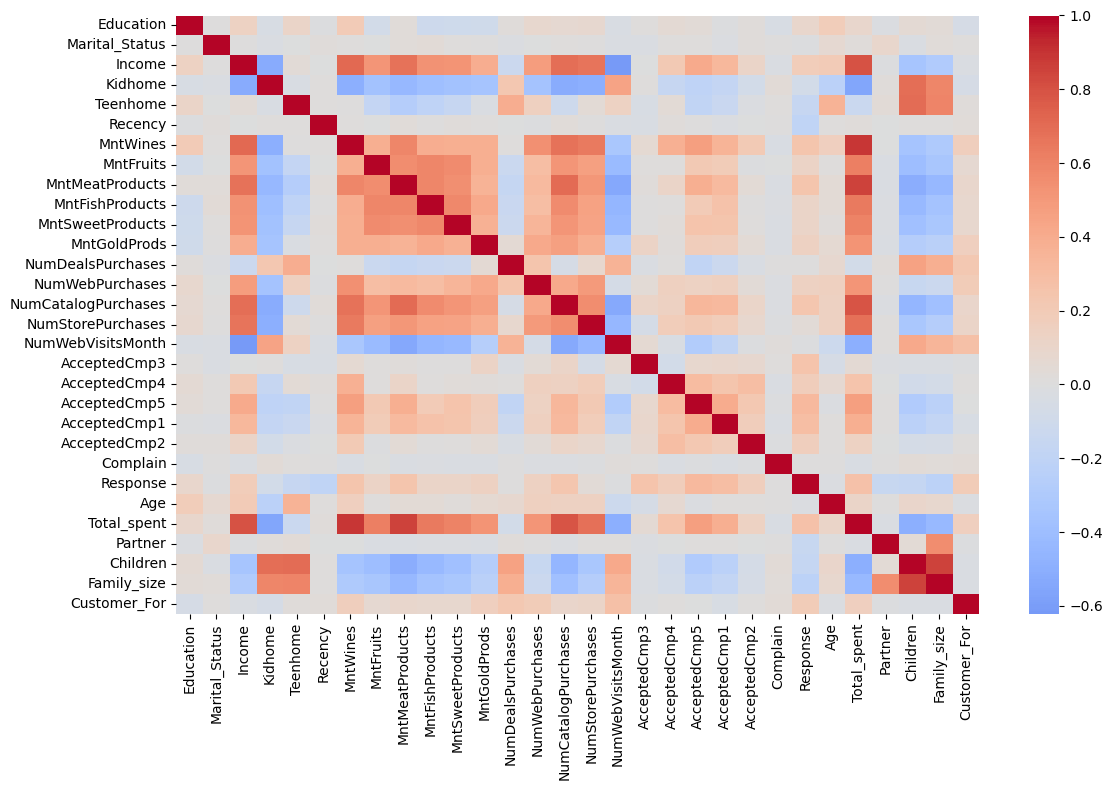

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(table.corr(), cmap='coolwarm', center=0)
plt.tight_layout()
plt.show()

#### 6.2. Подготовка датасета

In [18]:
df2 = table.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                          'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'])

#### 6.3. Группы признаков

In [19]:
# Перечислим столбцы с категориальными данными
categorical_columns = ['Education', 'Marital_Status', 'Partner']
# Перечислим столбцы с числовыми данными
numeric_columns = [column for column in df2.columns.to_list() if column not in categorical_columns]

#### 6.4. Масштабирование

In [20]:
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(df2[numeric_columns])
scaled_df = pd.DataFrame(scaled_nums, columns=numeric_columns, index=df2.index)
scaled_df[categorical_columns] = df2[categorical_columns]

#### 6.5. Проверка

In [21]:
display(scaled_df.head(5), scaled_df.shape)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,Children,Family_size,Customer_For,Education,Marital_Status,Partner
0,0.332405,-0.825592,-0.931676,0.307314,0.980166,1.550778,1.736151,2.456789,1.472029,0.842690,...,-0.559160,0.689920,1.015715,1.683247,-1.266277,-1.759459,1.529265,2,4,0
1,-0.221969,1.031365,0.904492,-0.383771,-0.873191,-0.637618,-0.726371,-0.651738,-0.632996,-0.731824,...,-1.176175,-0.138430,1.272020,-0.962795,1.393978,0.445057,-1.190769,2,4,0
2,0.965793,-0.825592,-0.931676,-0.798422,0.359410,0.569773,-0.174584,1.341376,-0.149082,-0.040574,...,1.291882,-0.552605,0.332234,0.283674,-1.266277,-0.657201,-0.206611,2,5,1
3,-1.147868,1.031365,-0.931676,-0.798422,-0.873191,-0.562156,-0.662528,-0.505455,-0.584604,-0.751025,...,-0.559160,0.275745,-1.291031,-0.919526,0.063851,0.445057,-1.062186,2,5,1
4,0.339690,1.031365,-0.931676,1.551268,-0.392031,0.418849,-0.215626,0.152822,-0.003908,-0.559011,...,0.057854,-0.138430,-1.034726,-0.305445,0.063851,0.445057,-0.953384,4,3,1


(2229, 23)

### 7. Понижение размерности с помощью PCA

**Цель**: Сократить пространство признаков, сохранив не менее 90% дисперсии данных.

-   **Применение PCA**: Вычислить главные компоненты и проверить, сколько дисперсии объясняет каждая из них.
-   **График локтя**: Показать кумулятивную дисперсию, чтобы найти точку, где сохраняется ≥90% информации.
-   **Выбор компонент**: Выбрать наименьшее количество компонент, удовлетворяющих порогу в 90%.
-   **Преобразование данных**: Применить PCA для создания `pca_df` - сокращенного датасета, готового для кластеризации или моделирования.

#### 7.1. Применение PCA

In [22]:
pca = PCA()
data_pca = pca.fit_transform(scaled_df)

explained_var = pca.explained_variance_ratio_
display(explained_var)

array([3.49070088e-01, 1.19418033e-01, 7.24032816e-02, 5.90838599e-02,
       5.18664754e-02, 4.64328090e-02, 4.42524294e-02, 3.38437716e-02,
       3.02632867e-02, 2.70262582e-02, 2.58829720e-02, 2.33795506e-02,
       1.93731408e-02, 1.85677038e-02, 1.74166661e-02, 1.68148581e-02,
       1.47221951e-02, 1.21263661e-02, 1.00221425e-02, 8.03411250e-03,
       1.11326177e-17, 0.00000000e+00, 0.00000000e+00])

#### 7.2. График локтя

In [23]:
cum_explained_var = np.cumsum(explained_var)
explained_var_list = range(1, len(cum_explained_var) + 1)

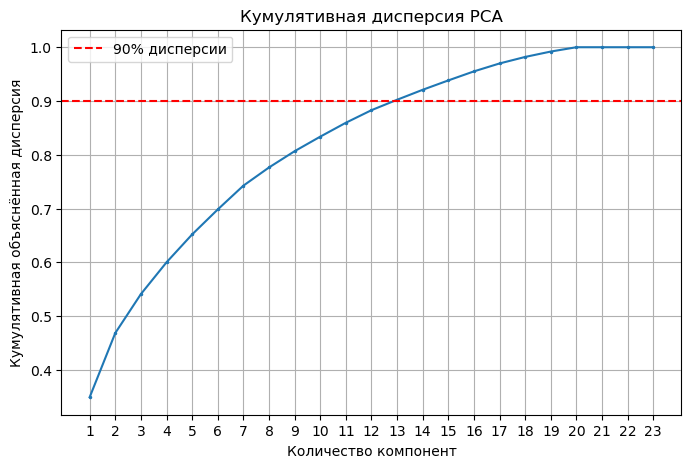

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(explained_var_list, cum_explained_var, marker='o', markersize=1.5)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% дисперсии')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объяснённая дисперсия')
plt.title('Кумулятивная дисперсия PCA')
plt.grid(True)
plt.xticks(explained_var_list)
plt.legend()
plt.show()

#### 7.3. Выбор компонент

На графике выше видно, что наименьшее количество компонент, удовлетворяющих порогу в 90%, равно 13. Ниже результат нахождения этого числа с помощью методов библиотеки NumPy

In [25]:
components_count = np.argmax(cum_explained_var >= 0.9) + 1
print(f"Наименьшее количество компонент, удовлетворяющих порогу в 90%: {components_count}")

Наименьшее количество компонент, удовлетворяющих порогу в 90%: 13


#### 7.4. Преобразование данных

In [26]:
pca_final = PCA(n_components=components_count)
pca_data = pca_final.fit_transform(scaled_df)

pca_columns = [f'PC{index+1}' for index in range(components_count)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns, index=scaled_df.index)

display(pca_df.head(5), pca_df.shape)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,4.734991,-0.190245,-1.918086,1.014414,0.876588,-0.117337,0.419968,1.757442,0.814136,0.065868,1.552235,-0.596927,-0.279174
1,-2.838525,0.237092,1.304215,-1.523005,0.032786,-0.636324,-0.270291,0.470746,-0.023067,0.376803,0.815263,-0.117706,-0.186560
2,2.293244,-0.707669,0.198877,0.046353,1.185044,-0.738688,-1.087306,-0.643092,0.040700,-0.858662,-0.058198,-0.572736,0.988896
3,-2.632093,-1.655664,-0.072681,-0.567900,0.845505,0.858756,-1.217037,-0.967482,-0.009719,-0.163532,0.114559,0.012919,0.157256
4,-0.447214,0.233520,0.297346,0.137755,-1.009924,2.295523,1.099678,-0.808749,1.085087,-0.964883,0.705073,0.582511,0.190436


(2229, 13)

### 8. Кластеризация K-Means

**Цель**: Сгруппировать клиентов в содержательные сегменты.

-   **Метод локтя**: Протестировать значения K от 1 до 10 и построить график инерции, чтобы найти "локоть" - точку, где добавление большего количества кластеров дает незначительный выигрыш.
-   **Оптимальное K**: Локоть появился при **K = 3**, что указывает на три группы клиентов.
-   **Финальная модель**: Применить `KMeans(n_clusters=3)` и добавить полученные метки групп в датасет.

#### 8.1. Метод локтя

In [27]:
wcss = [] # список для записи показателя WCSS (ошибки)
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=37)
    kmeans.fit(pca_df)
    wcss += [kmeans.inertia_]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

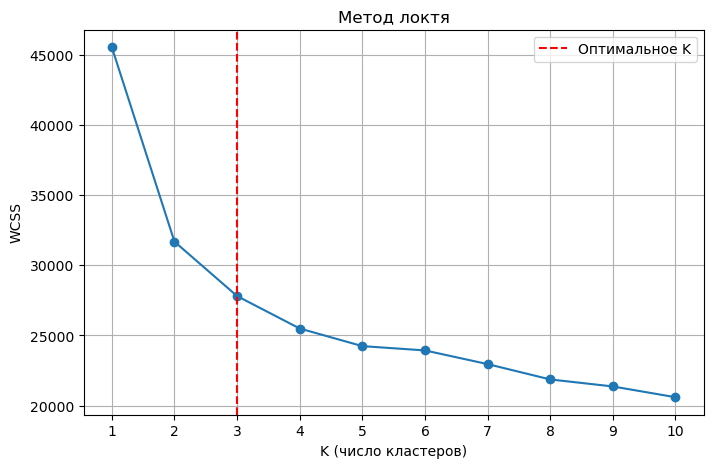

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.axvline(x=3, color='r', linestyle='--', label='Оптимальное K')
plt.xlabel('K (число кластеров)')
plt.ylabel('WCSS')
plt.title('Метод локтя')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

#### 8.2. Оптимальное K

Оптимальное K: Локоть появился при K = 3, что указывает на три группы клиентов.

#### 8.3. Финальная модель

In [29]:
kmeans_final = KMeans(n_clusters=3, random_state=37)
cluster_labels = kmeans_final.fit_predict(pca_df)

pca_df['Cluster'] = cluster_labels
df2['Cluster'] = cluster_labels
display(pca_df.head(5), df2.head(5))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Cluster
0,4.734991,-0.190245,-1.918086,1.014414,0.876588,-0.117337,0.419968,1.757442,0.814136,0.065868,1.552235,-0.596927,-0.279174,1
1,-2.838525,0.237092,1.304215,-1.523005,0.032786,-0.636324,-0.270291,0.470746,-0.023067,0.376803,0.815263,-0.117706,-0.186560,2
2,2.293244,-0.707669,0.198877,0.046353,1.185044,-0.738688,-1.087306,-0.643092,0.040700,-0.858662,-0.058198,-0.572736,0.988896,1
3,-2.632093,-1.655664,-0.072681,-0.567900,0.845505,0.858756,-1.217037,-0.967482,-0.009719,-0.163532,0.114559,0.012919,0.157256,2
4,-0.447214,0.233520,0.297346,0.137755,-1.009924,2.295523,1.099678,-0.808749,1.085087,-0.964883,0.705073,0.582511,0.190436,0


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,Partner,Children,Family_size,Customer_For,Cluster
0,2,4,58138.0,0,0,58,635,88,546,172,...,10,4,7,64,1617,0,0,1,3405,1
1,2,4,46344.0,1,1,38,11,1,6,2,...,1,2,5,67,27,0,2,3,2855,2
2,2,5,71613.0,0,0,26,426,49,127,111,...,2,10,4,56,776,1,0,2,3054,1
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,4,6,37,53,1,1,3,2881,2
4,4,3,58293.0,1,0,94,173,43,118,46,...,3,6,5,40,422,1,1,3,2903,0


### 9. 3D визуализация кластеров

**Цель**: Увидеть, насколько хорошо 3 кластера разделяются в основных PCA-измерениях.

-   **Проверка дисперсии**: Убедиться, что первые 3 главные компоненты объясняют большую часть дисперсии данных.
-   **3D диаграмма рассеяния**: Построить график `PC1`, `PC2` и `PC3` с точками, окрашенными в соответствии с метками кластеров, для визуальной проверки разделения групп.

#### 9.1. Проверка дисперсии

In [30]:
explained_var[:3].sum()

0.5408914021614194

#### 9.2. 3D диаграмма рассеяния

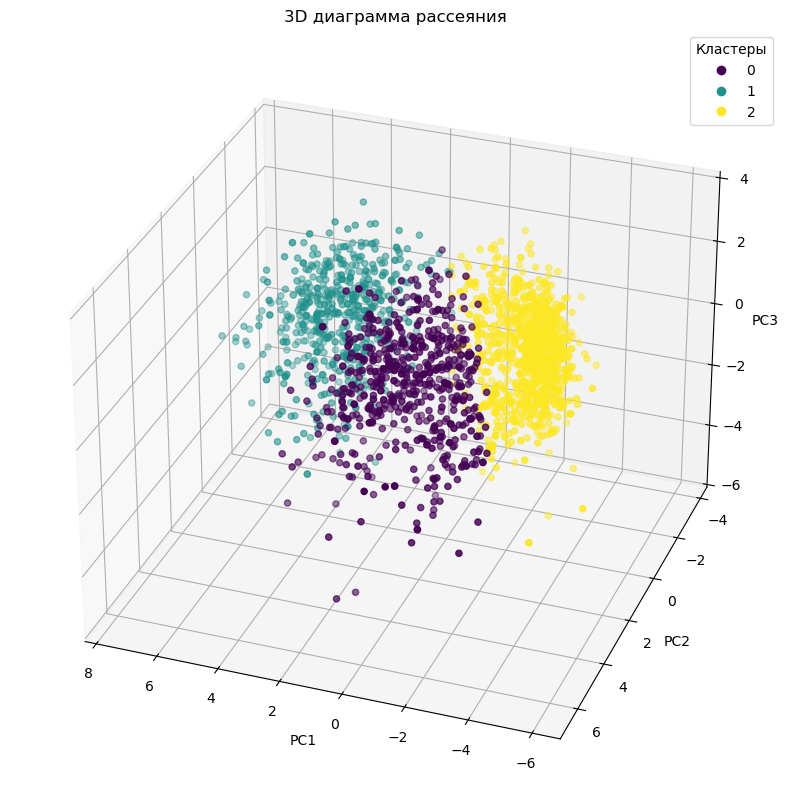

In [31]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D диаграмма рассеяния')

legend = ax.legend(*scatter.legend_elements(), title="Кластеры")
ax.view_init(elev=30, azim=110)
plt.tight_layout()
plt.show()

### 10. Профилирование кластеров и ключевые инсайты

**Цель**: Понять, чем 3 кластера отличаются по демографии, тратам и вовлеченности.

-   **Размер кластера**: Countplot показывает, сколько клиентов принадлежит к каждой группе.
-   **Доход vs. Траты**: Диаграмма рассеяния показывает, какие кластеры сочетают высокий доход с высокими общими тратами.
-   **Траты на продукты**: Столбчатые диаграммы показывают средние траты по категориям (вино, мясо, сладости и т.д.) для каждого кластера.
-   **Промоакции**: Другая столбчатая диаграмма показывает, как часто каждый кластер покупает по скидкам или акциям.

Эти сравнения превращают сырые кластеры в четкие сегменты клиентов, направляя маркетинговые и продуктовые стратегии.

#### 10.1. Размер кластера

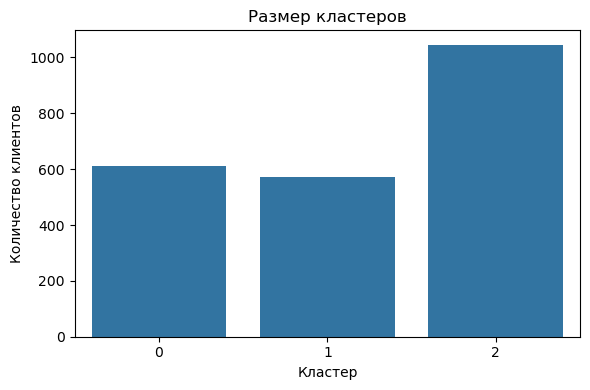

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df2)
plt.xlabel('Кластер')
plt.ylabel('Количество клиентов')
plt.title('Размер кластеров')
plt.tight_layout()
plt.show()

#### 10.2. Доход vs. Траты

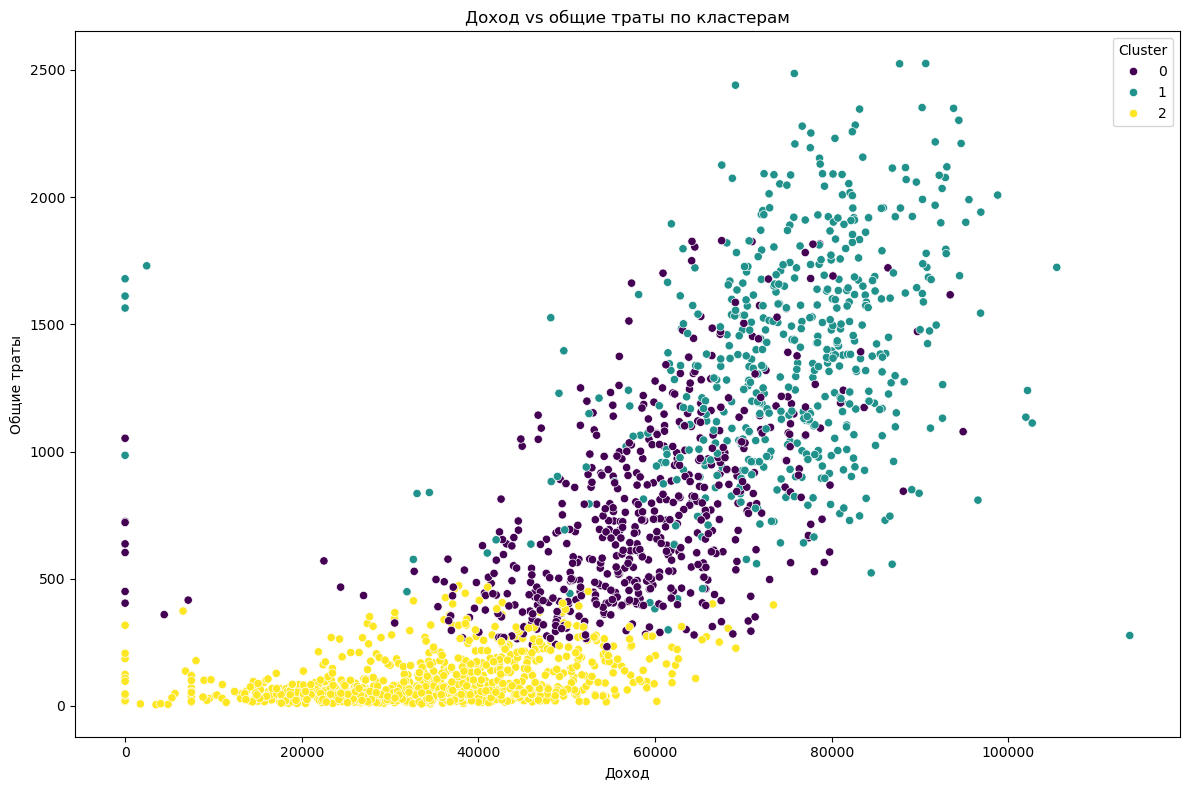

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df2, x='Income', y='Total_spent', hue='Cluster', palette='viridis')
plt.xlabel('Доход')
plt.ylabel('Общие траты')
plt.title('Доход vs общие траты по кластерам')
plt.tight_layout()
plt.show()

#### 10.3. Траты на продукты

In [34]:
mnt_columns = mnt_query.columns.to_list()
mnt_cluster_mean = df2.groupby('Cluster')[mnt_columns].mean()

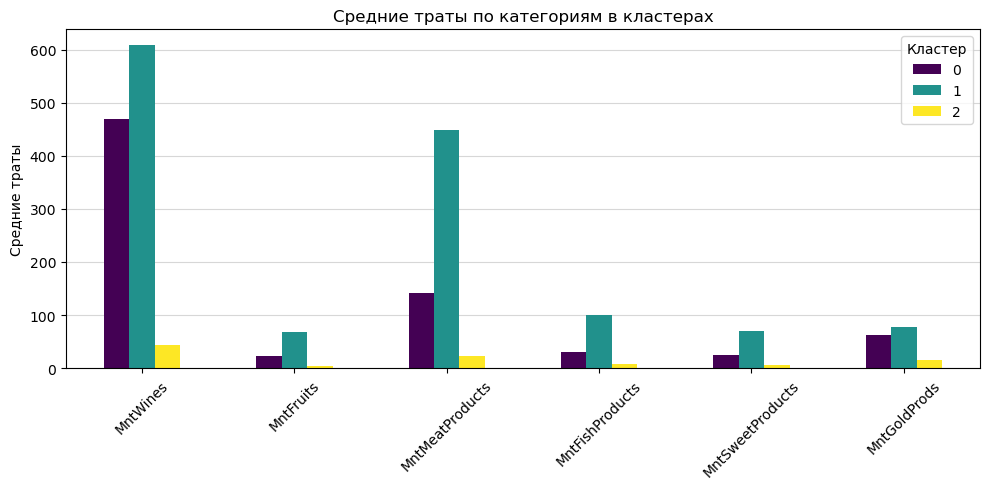

In [35]:
mnt_cluster_mean.T.plot(kind='bar', figsize=(10, 5), colormap='viridis', zorder=2)
plt.ylabel('Средние траты')
plt.title('Средние траты по категориям в кластерах')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5, zorder=1)
plt.legend(title='Кластер')
plt.tight_layout()
plt.show()

#### 10.4. Промоакции

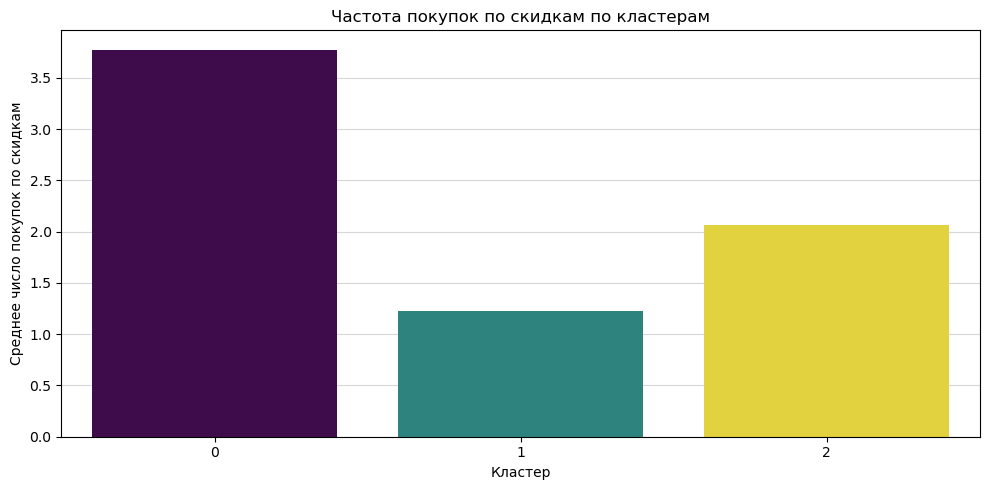

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df2, x='Cluster', y='NumDealsPurchases', errorbar=None, palette='viridis', hue='Cluster', legend=False, zorder=2)
plt.ylabel('Среднее число покупок по скидкам')
plt.xlabel('Кластер')
plt.title('Частота покупок по скидкам по кластерам')
plt.grid(axis='y', alpha=0.5, zorder=1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 11. Описание групп

Основываясь на паттерне трат и демографическом анализе, опишите 3 группы.

Дополнительно построим графики рассеяния по кластерам и оценим паттерны трат в разных категориях

In [58]:
purchase_columns = purchase_query.index.to_list()

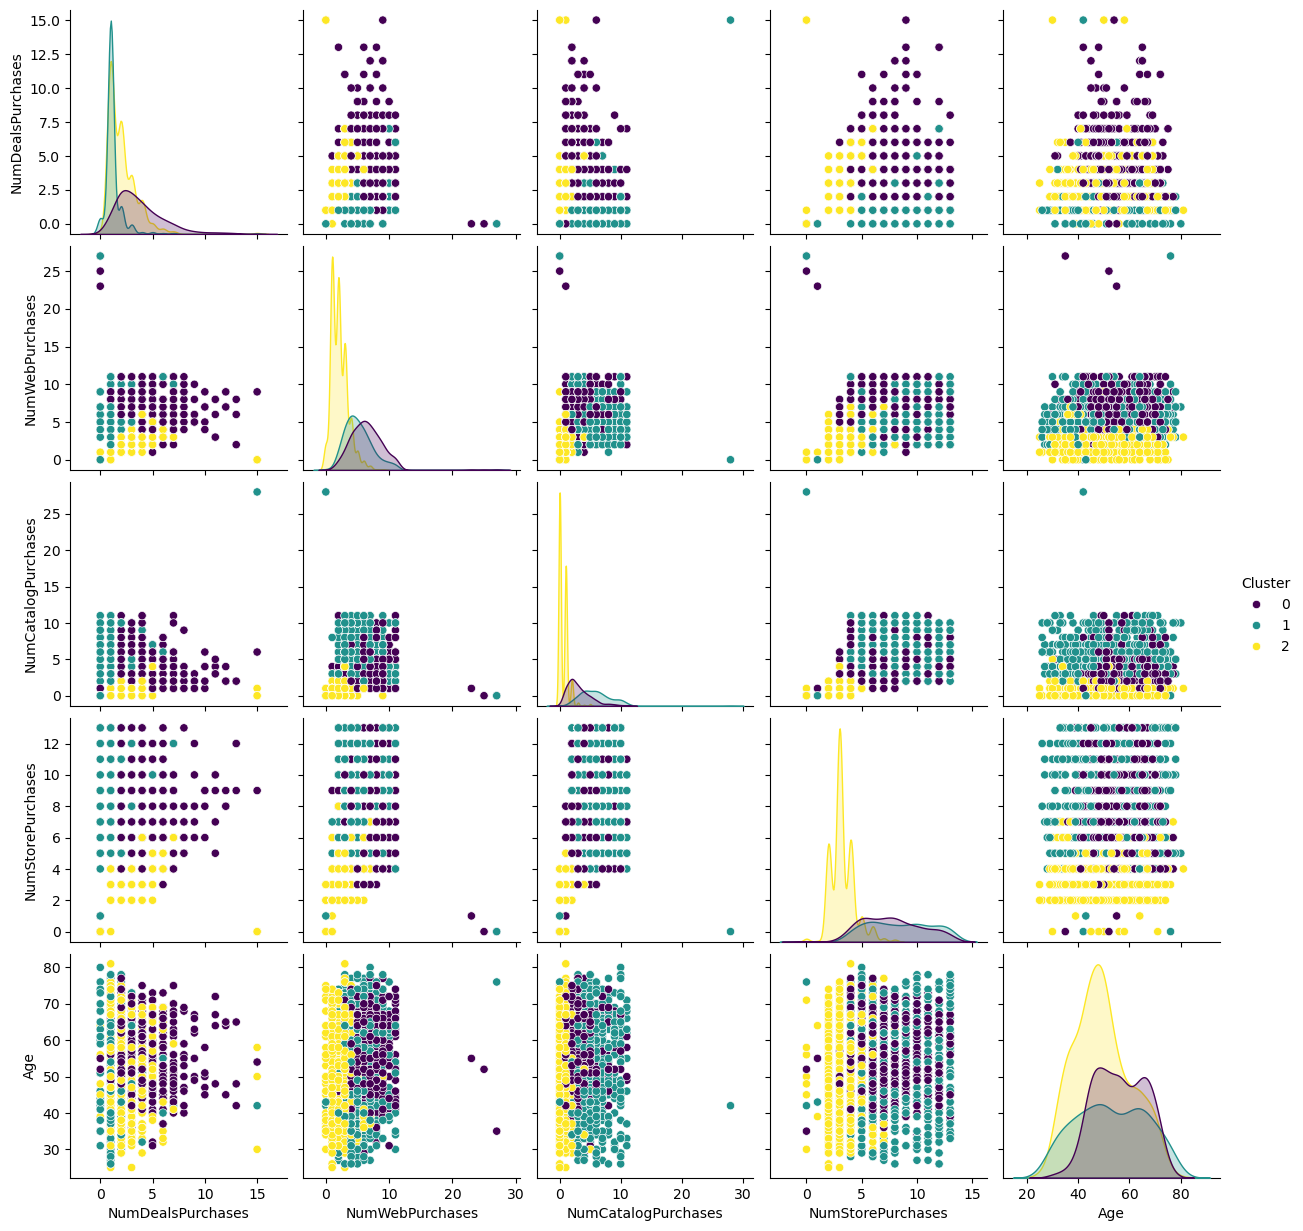

In [60]:
sns.pairplot(data=df2[purchase_columns+['Age','Cluster']], palette='viridis', hue='Cluster')
plt.show()

**Кластер 0**

- Клиенты со средними доходами и средними тратами, но с большей долей премиальных продуктов (вино, золото)
- Кластер состоит преимущественно из клиентов старше 40 лет
- Клиенты этого кластера намного активнее пользуются скидками

**Кластер 1**

- Клиенты с высокими доходами и высокими тратами
- Более высокая доля мяса в продуктовой корзине, низкая доля золота
- Меньше всего покупок по скидкам
- Больше молодых клиентов по сравнению с кластером 0

**Кластер 2**

- Клиенты с низкими и средними доходами и низкими тратами
- Небольшое число любых покупок, относительно высокое число покупок по скидкам

### 12. Сравнительный анализ

Демографические данные и данные о расходах по группам (количество детей, подростков, размер семьи, возраст, общие траты).

Дополнительно построим графики рассеяния по кластерам, скрипичную диаграмму и оценим демографические данные в разных категориях

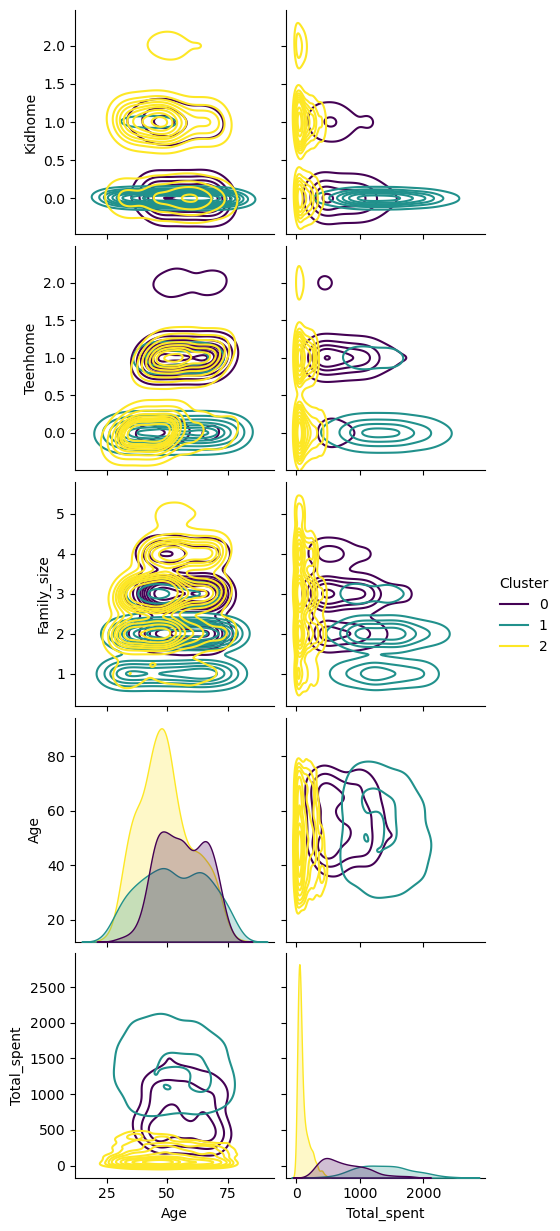

In [90]:
sns.pairplot(data=df2,
             y_vars=['Kidhome', 'Teenhome', 'Family_size', 'Age', 'Total_spent'],
             x_vars=['Age', 'Total_spent'],
             hue='Cluster',
             palette='viridis',
             kind='kde')
plt.show()

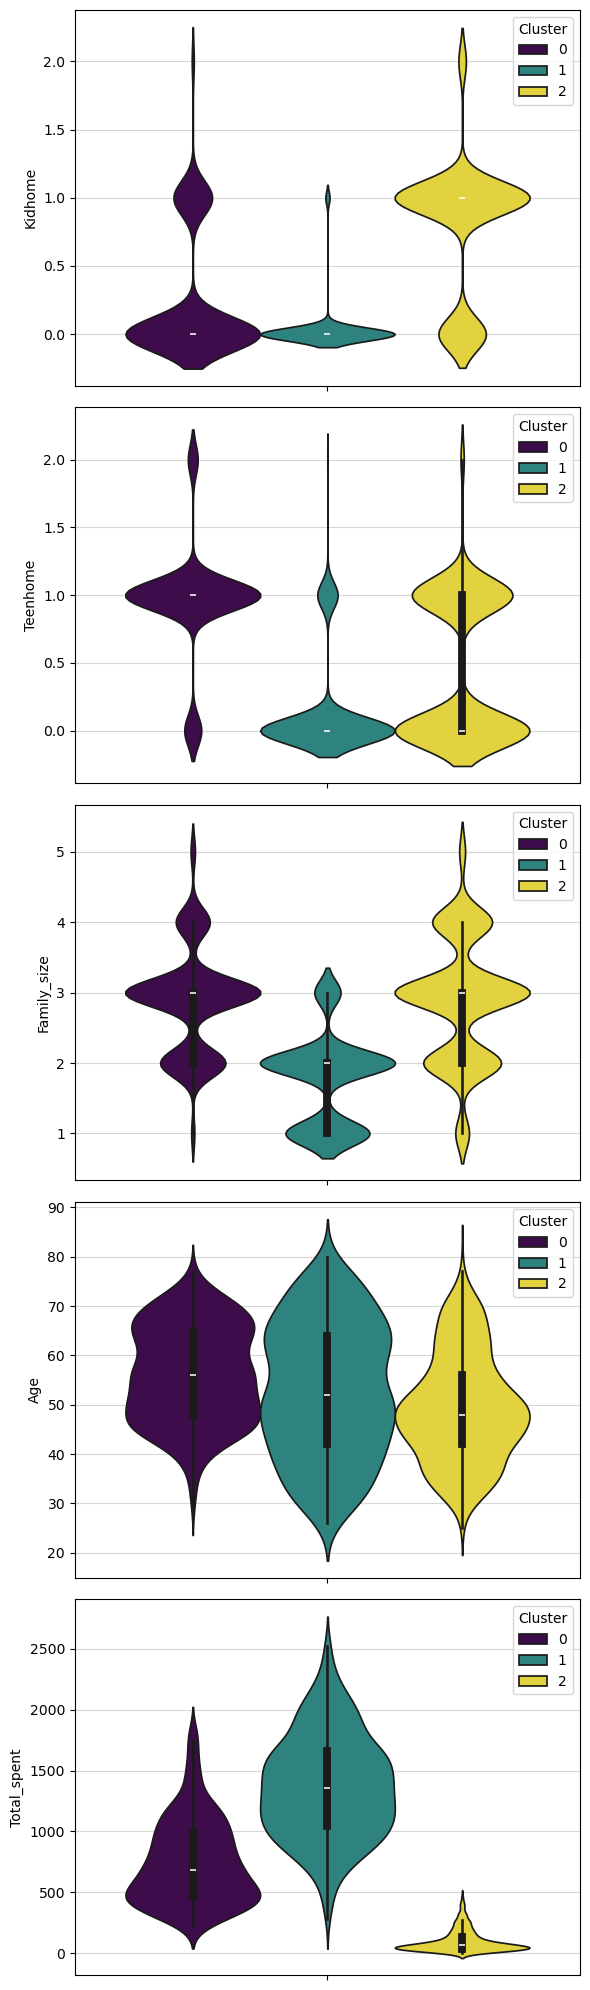

In [88]:
plt.figure(figsize=(6, 20))

plt.subplot(5, 1, 1)
sns.violinplot(data=df2, y='Kidhome', palette='viridis', hue='Cluster', zorder=2)
plt.grid(axis='y', alpha=0.5, zorder=1)

plt.subplot(5, 1, 2)
sns.violinplot(data=df2, y='Teenhome', palette='viridis', hue='Cluster', zorder=2)
plt.grid(axis='y', alpha=0.5, zorder=1)

plt.subplot(5, 1, 3)
sns.violinplot(data=df2, y='Family_size', palette='viridis', hue='Cluster', zorder=2)
plt.grid(axis='y', alpha=0.5, zorder=1)

plt.subplot(5, 1, 4)
sns.violinplot(data=df2, y='Age', palette='viridis', hue='Cluster', zorder=2)
plt.grid(axis='y', alpha=0.5, zorder=1)

plt.subplot(5, 1, 5)
sns.violinplot(data=df2, y='Total_spent',palette='viridis', hue='Cluster', zorder=2)
plt.grid(axis='y', alpha=0.5, zorder=1)

plt.tight_layout()
plt.show()

**Кластер 0**

- Клиенты со средними тратами и средним размером семьи
- Клиенты обычно с одним подростком, иногда с детьми младшего возраста
- Пик размера семьи приходится на возраст около 50 лет
- Дети появляются позже, чем у клиентов из других кластеров

**Кластер 1**

- Клиенты с высокими тратами и небольшим размером семьи
- Кластер преимущественно состоит из бездетных клиентов
- Если дети есть, то рождаются они преимущественно после 30 лет
- Пик размера семьи приходится примерно на 40 лет

**Кластер 2**

- Клиенты с низкими тратами и с большими семьями
- В среднем больше детей младшего возраста, чем подростков
- Первый ребёнок появляется в 25 лет и раньше
- Пик размера семьи приходится на возраст около 50 лет

## Вывод

Были рассмотрены данные о покупателях в магазине за определённый период. Данные были очищены и преобразованы, проведена аналитика с построением корреляционной таблицы, с применением метода главных компонент (PCA) и с кластеризацией данных. Были даны описания для каждой группы покупателей